In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

thompson ca
ilulissat gl
ribeira grande pt
fairbanks us
pevek ru
nikolskoye ru
bonavista ca
longyearbyen sj
aksarka ru
saldanha za
ust-ilimsk ru
bredasdorp za
avarua ck
gizo sb
hobart au
faanui pf
georgetown sh
mataura pf
kargasok ru
sitka us
puerto ayora ec
rikitea pf
hasaki jp
nikolskoye ru
albany au
temaraia ki
leningradskiy ru
kaitangata nz
ushuaia ar
jamestown sh
viersen de
saint george bm
busselton au
gidam in
rikitea pf
norman wells ca
richards bay za
tuktoyaktuk ca
okhotsk ru
beni cd
sibolga id
bengkulu id
cabo san lucas mx
busselton au
vaini to
taolanaro mg
bhadrachalam in
atuona pf
ushuaia ar
petropavlovsk-kamchatskiy ru
barrow us
ushuaia ar
carnarvon au
glendive us
almaznyy ru
illoqqortoormiut gl
aswan eg
raudeberg no
barrow us
ngunguru nz
alta no
broome au
beringovskiy ru
cape town za
ushuaia ar
souillac mu
thompson ca
mataura pf
ushuaia ar
carnarvon au
dikson ru
vila franca do campo pt
kahului us
geraldton au
vanimo pg
yagodnoye ru
ahuimanu us
ushuaia ar
la ronge ca
nouadh

cape town za
yulara au
ulaangom mn
cape town za
albany au
formosa do rio preto br
pevek ru
hasaki jp
vysokogornyy ru
lavrentiya ru
marion us
thompson ca
avarua ck
ostrovnoy ru
rikitea pf
port alfred za
jamestown sh
lagoa pt
vila franca do campo pt
ushuaia ar
mataura pf
cape town za
tallahassee us
clyde river ca
corinto br
albany au
goderich sl
lebu cl
attawapiskat ca
camacupa ao
aranos na
thompson ca
tasiilaq gl
lorengau pg
rikitea pf
khonsa in
souillac mu
butaritari ki
belushya guba ru
atuona pf
taolanaro mg
qaanaaq gl
samarai pg
trofors no
yellowknife ca
gulshat kz
jieshi cn
mar del plata ar
bethel us
hilo us
ribeira grande pt
yellowknife ca
hami cn
busselton au
vaini to
hobart au
attawapiskat ca
rikitea pf
rikitea pf
port alfred za
saint-augustin ca
albany au
jamestown sh
butaritari ki
kaitangata nz
caranavi bo
klaksvik fo
nizhneyansk ru
salina cruz mx
san ramon de la nueva oran ar
butaritari ki
esperance au
narsaq gl
los llanos de aridane es
nanortalik gl
haines junction ca
leh in


cape town za
mataura pf
barrow us
parabel ru
college us
bethel us
pevek ru
carnarvon au
galle lk
dikson ru
butaritari ki
bambous virieux mu
pangody ru
rikitea pf
durazno uy
san patricio mx
yellowknife ca
georgetown sh
punta arenas cl
denau uz
harbour breton ca
carthage us
chachapoyas pe
vaini to
punta arenas cl
ancud cl
baghdad iq
aklavik ca
la ronge ca
taolanaro mg
dhidhdhoo mv
chitral pk
victoria sc
mys shmidta ru
toulepleu ci
mandalgovi mn
busselton au
skibbereen ie
christchurch nz


In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

642

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | fairbanks
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | bonavista
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | aksarka
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | ust-ilimsk
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | gizo
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | kargasok
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | hasaki
Pr

Processing Record 38 of Set 4 | codrington
Processing Record 39 of Set 4 | westport
Processing Record 40 of Set 4 | alexandria
Processing Record 41 of Set 4 | nizwa
Processing Record 42 of Set 4 | chokurdakh
Processing Record 43 of Set 4 | ust-tsilma
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | pacific grove
Processing Record 46 of Set 4 | unai
Processing Record 47 of Set 4 | rani
Processing Record 48 of Set 4 | kapuskasing
Processing Record 49 of Set 4 | harindanga
Processing Record 50 of Set 4 | cartagena
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | tual
Processing Record 3 of Set 5 | marzuq
Processing Record 4 of Set 5 | curup
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | bantry
Processing Record 7 of Set 5 | qui nhon
Processing Record 8 of Set 5 | khatanga
Processing Record 9 of Set 5 | sabha
Processing Record 10 of Set 5 | saint-pierre
Processing Record 11 of Set 5 | saint-francois
Processing Recor

Processing Record 27 of Set 8 | trofors
Processing Record 28 of Set 8 | gulshat
City not found. Skipping...
Processing Record 29 of Set 8 | jieshi
Processing Record 30 of Set 8 | hami
Processing Record 31 of Set 8 | saint-augustin
Processing Record 32 of Set 8 | caranavi
Processing Record 33 of Set 8 | salina cruz
Processing Record 34 of Set 8 | san ramon de la nueva oran
Processing Record 35 of Set 8 | narsaq
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | nanortalik
Processing Record 38 of Set 8 | leh
Processing Record 39 of Set 8 | taree
Processing Record 40 of Set 8 | mocuba
Processing Record 41 of Set 8 | urengoy
Processing Record 42 of Set 8 | prado
Processing Record 43 of Set 8 | hualmay
Processing Record 44 of Set 8 | bangkalan
Processing Record 45 of Set 8 | oistins
Processing Record 46 of Set 8 | baisha
Processing Record 47 of Set 8 | maua
Processing Record 48 of Set 8 | tungor
Processing Record 49 of Set 8 | baykit
Processing Record 50 o

Processing Record 15 of Set 12 | jinchang
Processing Record 16 of Set 12 | prince rupert
Processing Record 17 of Set 12 | belmonte
Processing Record 18 of Set 12 | torzhok
Processing Record 19 of Set 12 | bodden town
Processing Record 20 of Set 12 | suzu
City not found. Skipping...
Processing Record 21 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 22 of Set 12 | kapiri mposhi
Processing Record 23 of Set 12 | manyana
Processing Record 24 of Set 12 | quatre cocos
Processing Record 25 of Set 12 | barawe
City not found. Skipping...
Processing Record 26 of Set 12 | kisangani
Processing Record 27 of Set 12 | kabinda
Processing Record 28 of Set 12 | emerald
Processing Record 29 of Set 12 | mahmudabad
Processing Record 30 of Set 12 | honningsvag
Processing Record 31 of Set 12 | enid
Processing Record 32 of Set 12 | sri aman
Processing Record 33 of Set 12 | longos
Processing Record 34 of Set 12 | miramar
Processing Record 35 of Set 12 | buqayq
City not found. Skip

In [10]:
len(city_data)

585

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,47.71,88,81,10.49,CA,2021-06-11 11:00:55
1,Ilulissat,69.2167,-51.1000,37.42,75,75,4.61,GL,2021-06-11 11:03:48
2,Ribeira Grande,38.5167,-28.7000,68.40,94,75,3.44,PT,2021-06-11 11:03:48
3,Fairbanks,64.8378,-147.7164,53.24,75,99,1.41,US,2021-06-11 11:03:48
4,Pevek,69.7008,170.3133,30.79,91,83,11.34,RU,2021-06-11 11:03:48
5,Nikolskoye,59.7035,30.7861,76.89,42,94,2.62,RU,2021-06-11 11:03:49
6,Bonavista,48.6499,-53.1147,39.22,94,100,23.13,CA,2021-06-11 11:03:49
7,Longyearbyen,78.2186,15.6401,35.44,69,75,6.91,SJ,2021-06-11 11:03:09
8,Aksarka,66.5606,67.7975,65.03,45,99,20.45,RU,2021-06-11 11:03:49
9,Saldanha,-33.0117,17.9442,69.28,46,7,15.14,ZA,2021-06-11 11:03:50


In [12]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng',
             'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

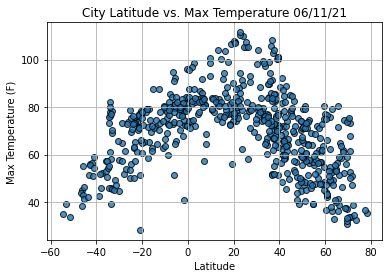

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

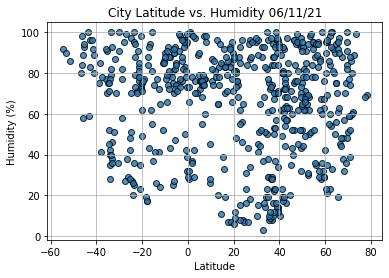

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

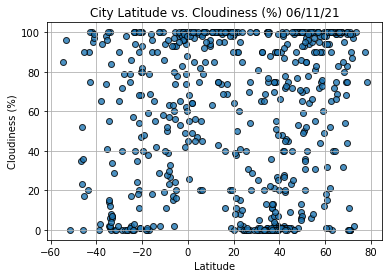

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()